In [2]:
#Importing Data from the CSV file
import os
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q1")
print("Path has been changed to:\n", os.getcwd())

import numpy as np
#Importing Data X from the CSV file
X = np.genfromtxt('linearX.csv', delimiter='\n')

#Reshape X to add the Intercept term. Since n=1 here, X should be a 2x100 matrix. 
X=np.reshape(X, (-1,1))
X= np.append(np.ones((X.shape)), X, axis=1)
print(X.shape)

#Importing Data Y from the CSV file
Y = np.genfromtxt('linearY.csv', delimiter='\n')
Y = np.reshape(Y, (-1,1))
print(Y.shape)
#print(X, Y)
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques1")
print("Path changed back to python file directory:\n", os.getcwd())

m = X.shape[0]
n = X.shape[1]
print(m,n)

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q1
(100, 2)
(100, 1)
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques1
100 2


In [3]:
#parameter initialization
theta = np.zeros((2,1)) #initialize to zero
print(type(theta))
#print(theta)
alpha = 0.0001 # Learning Rate
#The model gives error on LR below 1e-4 (NAN)
print("Learning Rate=", alpha)

<class 'numpy.ndarray'>
Learning Rate= 0.0001


In [4]:
#define the hypothesis function
h_x = np.dot(X, theta)
#print(h_x.shape)
#print(X[1,0])
#print(Y.shape)

In [5]:
#define the cost function
def cost(X, theta, Y):
    h_x = np.dot(X, theta)
    cost = (1/2*X.shape[0]) * np.sum((Y-h_x)**2)
    return cost
cost_final = cost(X, theta, Y)
print(cost_final)

4966.279047145


In [6]:
#function for calculating the cost function gradient

def cost_grad(X, theta, Y):
   # print(X.shape)
   # print(Y.shape)
    temp = np.dot(X, theta)-Y
   # print(temp.shape)
    #theta_grad = np.zeros((1,2))
    theta_grad = np.zeros((2,1))
    theta_grad += np.dot(X.transpose(), temp)
    #for i in range(m):
        #theta_grad += temp[i] * X[i, 0:2]
        #theta_grad[0] += temp[i] * X[i, 0]
        #theta_grad[1] += temp[i] * X[i, 1]
    #print(theta_grad)
    #return theta_grad.transpose()
    return theta_grad    

temp = h_x-Y
theta_grad = np.zeros((2,1))
arr = X[1, 0:2]
print(arr.shape)
print(temp[1,0])
print(temp[1,0]*arr)
print(theta_grad.shape)
theta_grad = temp[1,0]*arr
print(theta_grad.shape)


In [84]:
#Method 1 - Without Normalization, Fixed EPOCHS = 10000-50000

for i in range(50000):
    #if i % 1000 == 0:
    #    print('{} steps done'.format(i))
    theta -= alpha * cost_grad(X, theta, Y)


In [100]:
#Method 2 - Without Normalization, and termination based on cost function
print(cost_final)
i=0
while(cost_final >= 0.02):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
    
print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

4966.279047145
0.01999544686410678
Cost is = 0.01999544686410678 in iterations = 11791


In [116]:
#Method 3 - Without Normalization, and termination based on change in the cost function
i=0
print(cost_final)
while(abs(cost_grad(X, theta, Y)[1]) >= 0.0001):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
print("Cost is = {} in iterations = {}".format(cost_final, i))

4966.279047145
Cost is = 0.0119562468164015 in iterations = 19764


Text(0, 0.5, 'y axis - value')

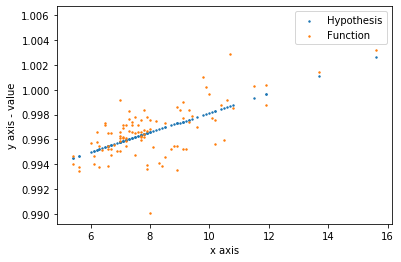

In [117]:
import matplotlib.pyplot as plt
yhyp = np.dot(X, theta)
#print(yhyp)
plt.scatter(X[0:100,1], yhyp, s = 2, label='Hypothesis')
plt.scatter(X[0:100,1], Y, s = 2, label='Function')
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis - value')
#plt.savefig('plot_theta_1e-4_un.png', dpi=1000, bbox_inches='tight')

In [118]:
print(theta)

[[9.90154208e-01]
 [8.00976130e-04]]


In [7]:
#Normalization of the Input X

mean = np.mean(X[0:101,1])
print(mean)
X[0:101,1] -= mean

var = np.std(X[0:101,1])**2
X[0:101,1] /= var
#print(X)

8.062


#Run cells 2, 3, and 4 after running cell 9 

In [92]:
#Method 1 - With Normalization, Fixed EPOCHS = 10000-50000

for i in range(50000):
    #if i % 1000 == 0:
    #    print('{} steps done'.format(i))
    theta -= alpha * cost_grad(X, theta, Y)


In [108]:
#Method 2 - With Normalization, and termination based on cost function
i=0
print(cost_final)
while(cost_final >= 0.02):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

4966.279047145
0.01998503860578692
Cost is = 0.01998503860578692 in iterations = 664


In [8]:
#Method 3 - With Normalization, and termination based on change in the cost function
i=0
cost_list= np.array([cost_final])
theta_all = theta
print(theta_all)
print(cost_final)
#cost_list = np.append(cost_list, cost_final)
while(abs(cost_grad(X, theta, Y)[1]) >= 0.0001):
    theta_all = np.append(theta_all,theta,axis=1)
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    cost_list = np.append(cost_list, cost_final)
    #cost_list.append(cost_final)
    #print(type(theta))
    #print(theta_all)
    i+=1

print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

[[0.]
 [0.]]
4966.279047145
0.011947912862631253
Cost is = 0.011947912862631253 in iterations = 1974


In [9]:
print(np.size(cost_list))
print(type(cost_list))
print(cost_list)
print(theta_all.shape)
print(theta_all.shape)
print(theta_all[0].shape)
print(theta_all[1].shape)
print(cost_list.shape)

1975
<class 'numpy.ndarray'>
[4.96627905e+03 4.86745045e+03 4.77058854e+03 ... 1.19479131e-02
 1.19479130e-02 1.19479129e-02]
(2, 1975)
(2, 1975)
(1975,)
(1975,)
(1975,)


In [10]:
import matplotlib.pyplot as plt
yhyp = np.dot(X, theta)
#print(yhyp)
plt.scatter(X[0:100,1], yhyp, s = 2, label='Hypothesis')
plt.scatter(X[0:100,1], Y, s = 2, label='Function')
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis - value')
plt.show()
#plt.savefig('plot_theta_1e-4_norm.png', dpi=1000, bbox_inches='tight')

<Figure size 640x480 with 1 Axes>

[ 0.3495943  -0.02088135  0.3495943   0.11383706 -0.39135701 -0.12192017
  2.53876859 -0.25663859 -0.3576774  -0.29031819  0.68639034  1.15790481
 -0.3239978   0.65271074  0.28223509 -0.05456096 -0.82919186 -0.59343463
 -0.45871621  0.78742915  0.14751667 -0.22295898 -0.59343463 -0.89655107
  0.28223509  0.45063311 -0.18927938  1.29262322 -0.08824056 -0.22295898
  0.92214757  0.72006995 -0.62711424 -0.12192017  1.89885611 -0.02088135
 -0.45871621 -0.45871621 -0.3576774   0.08015746 -0.22295898  0.61903113
 -0.66079384 -0.3576774  -0.89655107  0.88846797 -0.15559977  0.28223509
  0.3832739  -0.49239582 -0.29031819 -0.02088135 -0.08824056 -0.05456096
 -0.3576774  -0.3576774  -0.15559977  0.3495943   0.31591469 -0.05456096
 -0.49239582  1.29262322 -0.52607542 -0.3239978   0.24855548 -0.18927938
 -0.12192017 -0.69447345  0.85478836 -0.49239582  0.04647785 -0.05456096
 -0.3239978  -0.82919186 -0.55975503 -0.18927938  0.58535153 -0.3576774
  0.82110876 -0.3239978  -0.62711424 -0.52607542 -0.

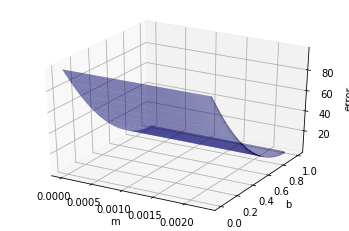

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import collections

def error(m, b, points):
    totalError = np.sum((points[0].y - (m * points[0].x + b)) ** 2)
    return totalError/100

x = X.transpose()[1]
y = Y
Point = collections.namedtuple('Point', ['x', 'y'])
points = [Point(x, y)]
print(points[0].x)
print(len(points))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ms = theta_all[1]
bs = theta_all[0]
ms = ms[0::10]
bs = bs[0::10]
print(ms.shape)
M, B = np.meshgrid(ms, bs)
print(M.shape)
print(B.shape)
zs = np.array([error(mp, bp, points) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
print(zs.shape)
Z = zs.reshape(M.shape)
print(Z.shape)
ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('error')

plt.show()

In [25]:
a=np.zeros((9,9))
b=np.zeros((9,9))
count=0
for i,j in zip(np.ravel(a), np.ravel(b)):
    count+=1
print(count)

81


In [29]:
#define the cost function
def cost_1(X, theta0,theta1, Y):
    h_x = X[0]*theta0 + X[1]*theta1
    cost = (1/2*X.shape[0]) * np.sum((Y-h_x)**2)
    return cost


(3900625,)


ValueError: Argument Z must be 2-dimensional.

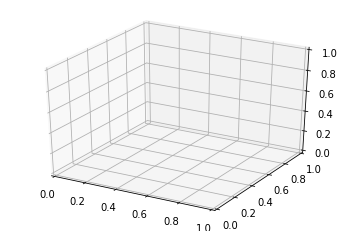

In [37]:
from mpl_toolkits import mplot3d
from numpy import *
fig = plt.figure()
ax = plt.axes(projection='3d')
x = theta_all[0]
y = theta_all[1]
z = cost_list

a,b = np.meshgrid(theta_all[0], theta_all[1])
c = np.array([cost_1(X, t0, t1, Y) for t0,t1 in zip(np.ravel(a), np.ravel(b))])
print(c.shape)
ax.plot_surface(a,b,c, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');
#ax.plot_trisurf(theta[0], theta[1], cost_list,
#                cmap='viridis', edgecolor='none');
#ax.plot3D(x,y,z);